Init + import 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix , classification_report
import seaborn as sns
import numpy as np

df = pd.read_csv('cardio_train_clean.csv')

In [55]:
X = df[['age', 'gender', 'weight', 'ap_hi', 'cholesterol', 'active']].values

y= df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model.fit(X,y)

DecisionTreeClassifier(max_depth=8, random_state=0)

Accuracy: 0.739
Matrice de confusion:
 [[5503 1566]
 [2088 4843]]
classification_report :
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      7069
           1       0.76      0.70      0.73      6931

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



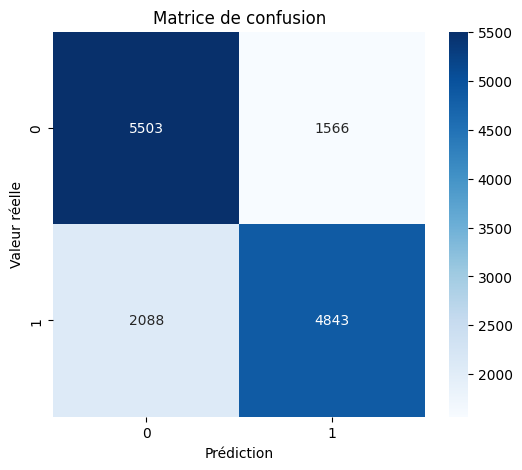

In [56]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()

In [57]:
# Prédire les probabilités
arthur = [53,2,85,df['ap_hi'].mean(),2,1]
y_pred = model.predict([arthur])
y_pred_prob = model.predict_proba([arthur])
print(f"prédiction pour arthur (0 = pas de risque cardio vasculaire ,1= risque cardio vasculaire) : " + str(y_pred))
print(f"probabilité de la prédiction : " + str(y_pred_prob[0][1]))


prédiction pour arthur (0 = pas de risque cardio vasculaire ,1= risque cardio vasculaire) : [0]
probabilité de la prédiction : 0.27722772277227725


In [ ]:
# Modèle 1 : Régression logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_proba_log = logreg.predict_proba(X_test)[:, 1]

# Modèle 2 : Arbre de décision
tree = DecisionTreeClassifier(max_depth=8, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)[:, 1]

# Évaluation
print("RÉGRESSION LOGISTIQUE")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("AUC :", roc_auc_score(y_test, y_proba_log))
print("Rapport de classification :\n", classification_report(y_test, y_pred_log))

print("\nARBRE DE DÉCISION")
print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("AUC :", roc_auc_score(y_test, y_proba_tree))
print("Rapport de classification :\n", classification_report(y_test, y_pred_tree))


RÉGRESSION LOGISTIQUE
Accuracy : 0.7228571428571429
AUC : 0.7855961556295186
Rapport de classification :
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000


ARBRE DE DÉCISION
Accuracy : 0.7359285714285714
AUC : 0.7923393693238608
Rapport de classification :
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

